# Feature Validation - Level 1

This notebook validates the Level 1 features generated by the features service.

**Objectives:**
1. Load and inspect feature data
2. Check for missing values and their patterns
3. Visualize key features over time
4. Verify no lookahead bias
5. Check feature distributions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Project root detection
project_root = Path.cwd()
while project_root.name != 'volatility_forecast' and project_root.parent != project_root:
    project_root = project_root.parent

print(f"Project root: {project_root}")

%matplotlib inline
sns.set_style("whitegrid")

Project root: /Users/aayushrijal/Documents/GitHub/volatility_forecast


## 1. Load Features Data

In [2]:
#all feature partitions
features_path = project_root / "data/features.L1"
feature_files = sorted(list(features_path.glob("date=*/features.parquet")))

print(f"Found {len(feature_files)} feature partitions")

features_df = pd.concat([pd.read_parquet(f) for f in feature_files], ignore_index=True)
features_df['date'] = pd.to_datetime(features_df['date'])
features_df = features_df.sort_values('date').reset_index(drop=True)

print(f"\nShape: {features_df.shape}")
print(f"Date range: {features_df['date'].min().date()} to {features_df['date'].max().date()}")
print(f"\nColumns ({len(features_df.columns)}):")
print(features_df.columns.tolist())

Found 2518 feature partitions

Shape: (2518, 21)
Date range: 2015-11-18 to 2025-11-21

Columns (21):
['date', 'spy_ret_1d', 'spy_ret_5d', 'spy_ret_10d', 'spy_ret_20d', 'spy_ret_60d', 'spy_vol_5d', 'spy_vol_10d', 'spy_vol_20d', 'spy_vol_60d', 'drawdown_60d', 'vix', 'vix3m', 'vix_term', 'rsi_spy_14', 'corr_spy_tlt_20d', 'corr_spy_hyg_20d', 'corr_spy_tlt_60d', 'corr_spy_hyg_60d', 'hyg_tlt_spread', 'rv_vix_spread_20d']

Shape: (2518, 21)
Date range: 2015-11-18 to 2025-11-21

Columns (21):
['date', 'spy_ret_1d', 'spy_ret_5d', 'spy_ret_10d', 'spy_ret_20d', 'spy_ret_60d', 'spy_vol_5d', 'spy_vol_10d', 'spy_vol_20d', 'spy_vol_60d', 'drawdown_60d', 'vix', 'vix3m', 'vix_term', 'rsi_spy_14', 'corr_spy_tlt_20d', 'corr_spy_hyg_20d', 'corr_spy_tlt_60d', 'corr_spy_hyg_60d', 'hyg_tlt_spread', 'rv_vix_spread_20d']


In [3]:
features_df.head(10)

,date,spy_ret_1d,spy_ret_5d,spy_ret_10d,spy_ret_20d,spy_ret_60d,spy_vol_5d,spy_vol_10d,spy_vol_20d,spy_vol_60d,...,vix,vix3m,vix_term,rsi_spy_14,corr_spy_tlt_20d,corr_spy_hyg_20d,corr_spy_tlt_60d,corr_spy_hyg_60d,hyg_tlt_spread,rv_vix_spread_20d
0,2015-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.850000,19.219999,1.140653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-11-19,-0.000863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.990000,19.639999,1.155974,NaN,NaN,NaN,NaN,NaN,-0.015636,NaN
2,2015-11-20,0.003638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.470000,18.940001,1.224305,NaN,NaN,NaN,NaN,NaN,0.002822,NaN
3,2015-11-23,-0.001147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.620000,18.629999,1.192702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-11-24,0.001338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.930000,18.709999,1.174513,NaN,NaN,NaN,NaN,NaN,0.001411,NaN
5,2015-11-25,-0.000143,0.002823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.190000,18.190001,1.197498,NaN,NaN,NaN,NaN,NaN,-0.001232,NaN
6,2015-11-27,0.001146,0.004831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.120000,17.350000,1.147487,NaN,NaN,NaN,NaN,NaN,0.002558,NaN
7,2015-11-30,-0.004160,-0.002967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.129999,18.490000,1.146311,NaN,NaN,NaN,NaN,NaN,-0.004569,NaN
8,2015-12-01,0.009490,0.007671,NaN,NaN,NaN,0.010549,NaN,NaN,NaN,...,14.670000,17.580000,1.198364,NaN,NaN,NaN,NaN,NaN,-0.006393,NaN
9,2015-12-02,-0.010257,-0.003925,NaN,NaN,NaN,0.014616,NaN,NaN,NaN,...,15.910000,18.330000,1.152106,NaN,NaN,NaN,NaN,NaN,-0.002368,NaN


In [4]:
features_df.tail(10)

,date,spy_ret_1d,spy_ret_5d,spy_ret_10d,spy_ret_20d,spy_ret_60d,spy_vol_5d,spy_vol_10d,spy_vol_20d,spy_vol_60d,...,vix,vix3m,vix_term,rsi_spy_14,corr_spy_tlt_20d,corr_spy_hyg_20d,corr_spy_tlt_60d,corr_spy_hyg_60d,hyg_tlt_spread,rv_vix_spread_20d
2508,2025-11-10,0.015484,-0.002784,-0.005561,0.027373,0.060148,0.022630,0.025586,0.033627,0.055016,...,17.600000,20.240000,1.150000,58.056839,-0.180761,0.616293,-0.141012,0.772977,0.003584,-17.566373
2509,2025-11-11,0.002287,0.011427,-0.005927,0.030882,0.062652,0.019412,0.025550,0.033683,0.055063,...,17.280001,20.190001,1.168403,62.446759,-0.161816,0.626772,-0.141076,0.773160,-0.003462,-17.246318
2510,2025-11-12,0.000556,0.008523,-0.005851,0.027008,0.068648,0.019108,0.025552,0.033393,0.054798,...,17.510000,20.340000,1.161622,60.107841,-0.157083,0.621567,-0.130193,0.770598,-0.003762,-17.476607
2511,2025-11-13,-0.016733,0.002578,-0.011525,0.017109,0.054576,0.022921,0.028413,0.036662,0.057194,...,20.000000,21.850000,1.092500,45.886617,0.093808,0.676397,-0.060475,0.784775,0.004113,-19.963338
2512,2025-11-14,-0.000164,0.001430,-0.014963,0.011285,0.058432,0.022901,0.028223,0.036220,0.057053,...,19.830000,21.580000,1.088250,37.998228,0.100864,0.669743,-0.068375,0.782696,0.005955,-19.793780
2513,2025-11-17,-0.009360,-0.023414,-0.026199,-0.008422,0.033832,0.019176,0.029662,0.035924,0.055732,...,22.379999,23.180000,1.035746,32.142289,0.001677,0.659201,-0.115523,0.772579,-0.004096,-22.344075
2514,2025-11-18,-0.008433,-0.034134,-0.022707,-0.016840,0.029810,0.020809,0.028458,0.036892,0.056189,...,24.690001,24.540001,0.993925,29.040705,-0.011648,0.641977,-0.118162,0.759201,0.000586,-24.653108
2515,2025-11-19,0.003856,-0.030834,-0.022311,-0.007772,0.029487,0.021157,0.028509,0.036728,0.056166,...,23.660000,23.990000,1.013948,35.700041,-0.002556,0.639840,-0.119755,0.758522,0.002520,-23.623272
2516,2025-11-20,-0.015360,-0.029461,-0.026883,-0.029044,0.011851,0.020114,0.030495,0.039321,0.058153,...,26.420000,25.760000,0.975019,28.290003,-0.045083,0.598761,-0.132882,0.741401,-0.004562,-26.380680
2517,2025-11-21,0.011428,-0.017869,-0.016439,-0.025755,0.019745,0.023166,0.032575,0.040143,0.059172,...,23.889999,24.290001,1.016743,34.298811,-0.038440,0.604815,-0.139568,0.746136,0.001737,-23.849857


## 2. Missing Values Analysis

In [5]:
missing = features_df.isnull().sum()
missing_pct = (missing / len(features_df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing Count', ascending=False)

print("Missing Values Summary:")
print(missing_df[missing_df['Missing Count'] > 0])

Missing Values Summary:
                   Missing Count  Missing %
corr_spy_hyg_60d              63       2.50
corr_spy_tlt_60d              63       2.50
spy_vol_60d                   63       2.50
spy_ret_60d                   60       2.38
drawdown_60d                  59       2.34
spy_vol_20d                   23       0.91
corr_spy_hyg_20d              23       0.91
corr_spy_tlt_20d              23       0.91
rv_vix_spread_20d             23       0.91
spy_ret_20d                   20       0.79
spy_vol_10d                   13       0.52
rsi_spy_14                    13       0.52
spy_ret_10d                   10       0.40
spy_vol_5d                     8       0.32
spy_ret_5d                     5       0.20
hyg_tlt_spread                 2       0.08
spy_ret_1d                     1       0.04


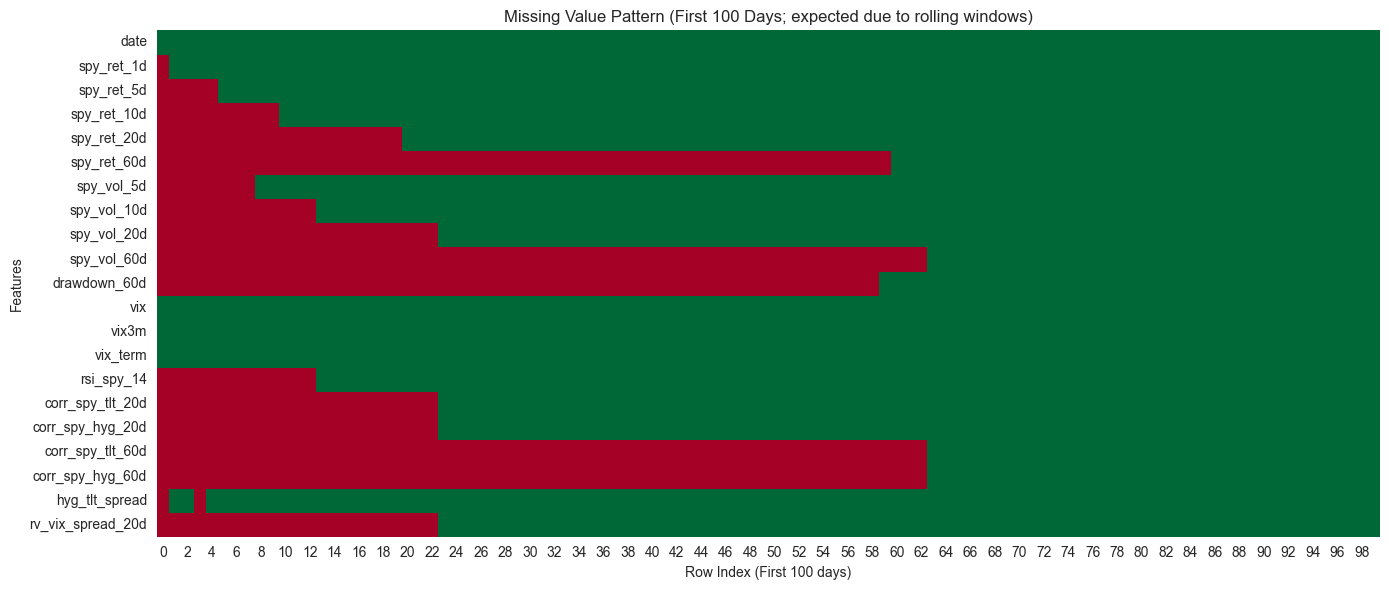

In [6]:
fig, ax = plt.subplots(figsize=(14, 6))

missing_pattern = features_df.head(100).isnull()
sns.heatmap(missing_pattern.T, cbar=False, cmap='RdYlGn_r', ax=ax)
ax.set_xlabel('Row Index (First 100 days)')
ax.set_ylabel('Features')
ax.set_title('Missing Value Pattern (First 100 Days; expected due to rolling windows)')
plt.tight_layout()
plt.show()

## 3. Feature Distributions

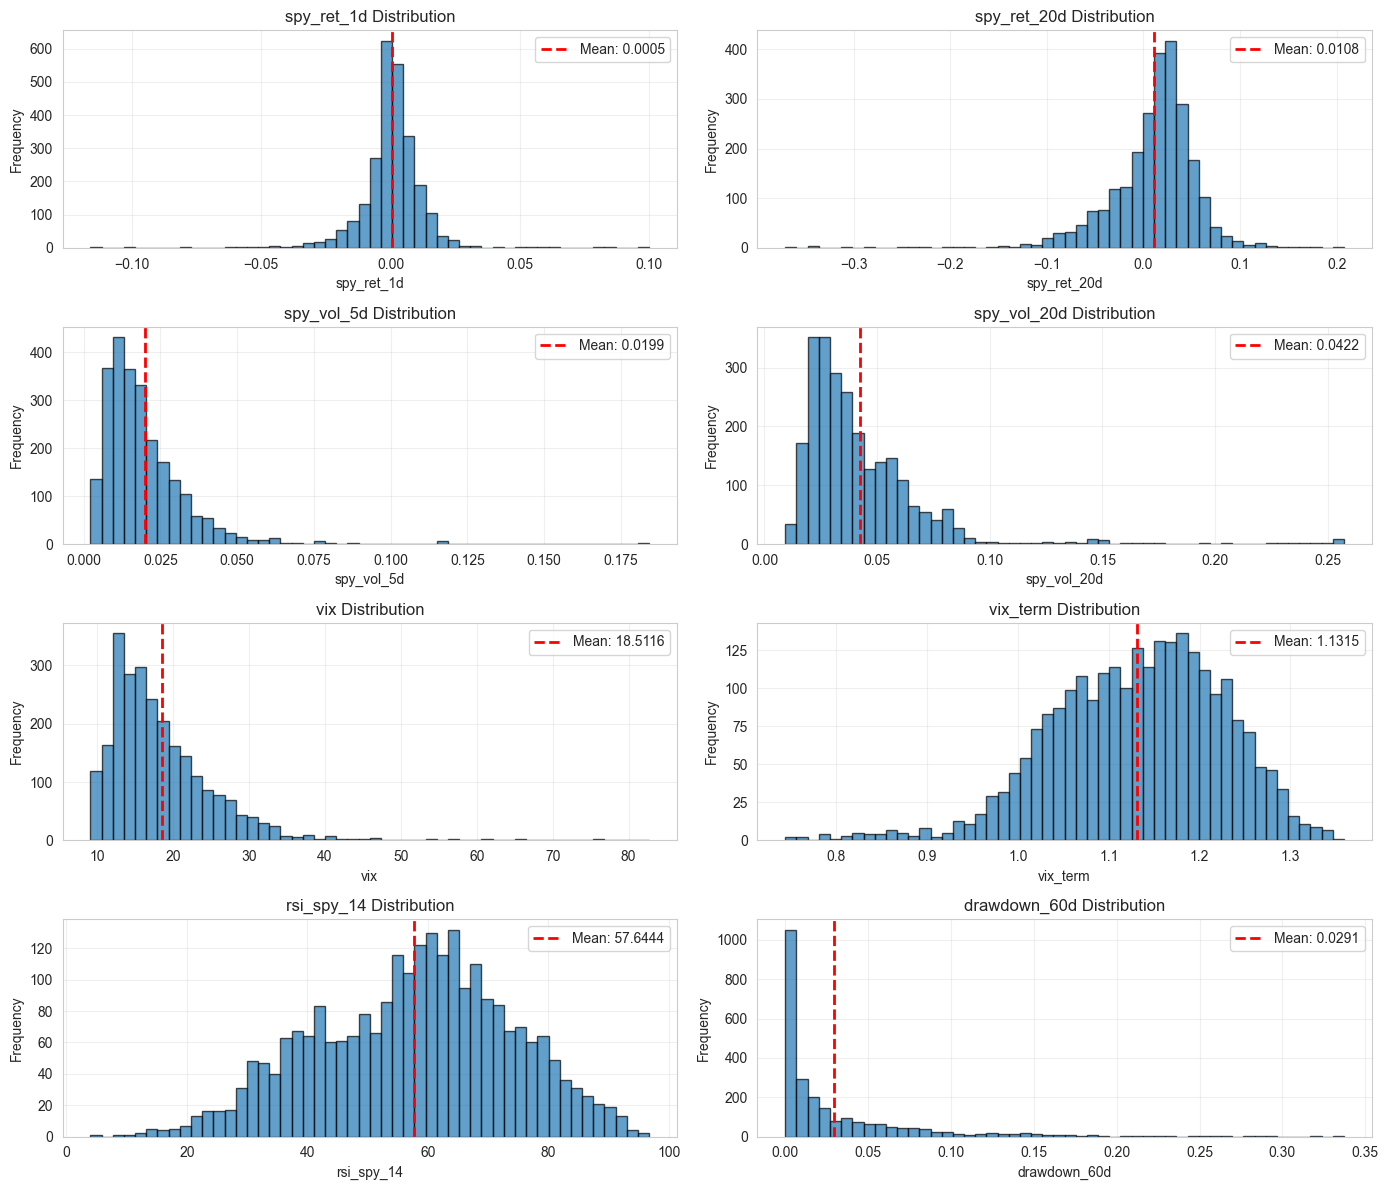

In [ ]:
# spy_ret_1d/20d: log returns (price changes)
# spy_vol_5d/20d: realized volatility (how much price moves)
# vix: implied volatility index (market's expectation of future volatility)
# vix_term: VIX3M/VIX ratio (term structure of volatility)
# rsi_spy_14: relative strength index (overbought/oversold momentum indicator)
# drawdown_60d: peak-to-trough decline (max loss from recent high)

features_to_plot = [
    'spy_ret_1d', 'spy_ret_20d', 
    'spy_vol_5d', 'spy_vol_20d',
    'vix', 'vix_term',
    'rsi_spy_14', 'drawdown_60d'
]

fig, axes = plt.subplots(4, 2, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(features_to_plot):
    data = features_df[col].dropna()
    axes[i].hist(data, bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{col} Distribution')
    axes[i].axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.4f}')
    axes[i].legend()
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Time Series of Key Features

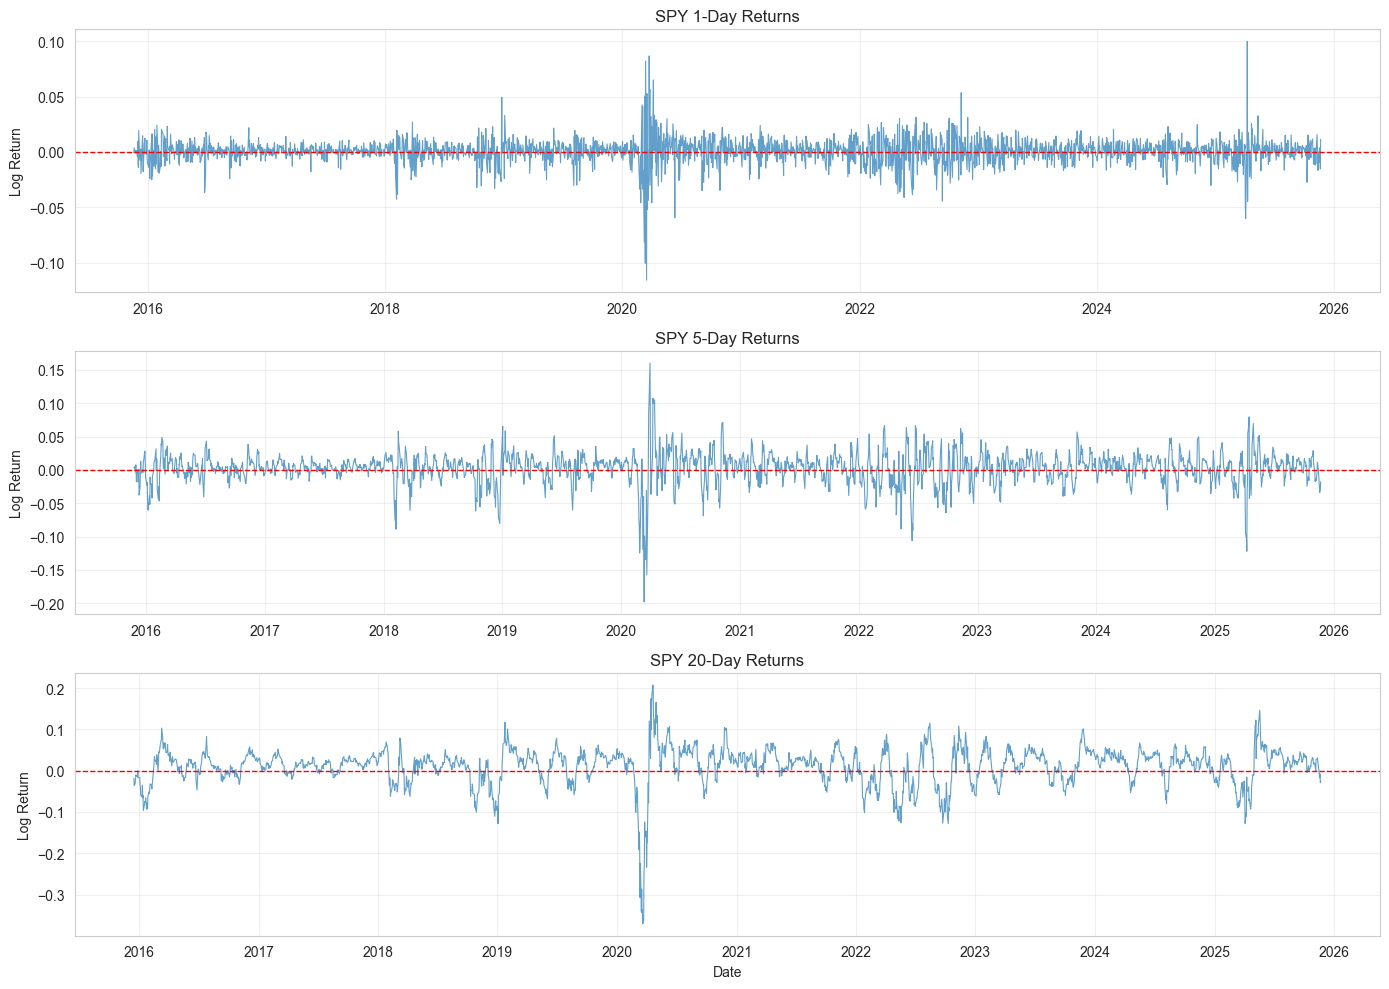

In [ ]:
# SPY returns over different time windows
# Shows how returns smooth out over longer periods
# 1d: daily noise, 5d: weekly trends, 20d: monthly moves

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

return_cols = ['spy_ret_1d', 'spy_ret_5d', 'spy_ret_20d']
titles = ['1-Day Returns', '5-Day Returns', '20-Day Returns']

for i, (col, title) in enumerate(zip(return_cols, titles)):
    axes[i].plot(features_df['date'], features_df[col], linewidth=0.8, alpha=0.7)
    axes[i].set_ylabel('Log Return')
    axes[i].set_title(f'SPY {title}')
    axes[i].axhline(0, color='red', linestyle='--', linewidth=1)
    axes[i].grid(alpha=0.3)

axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()

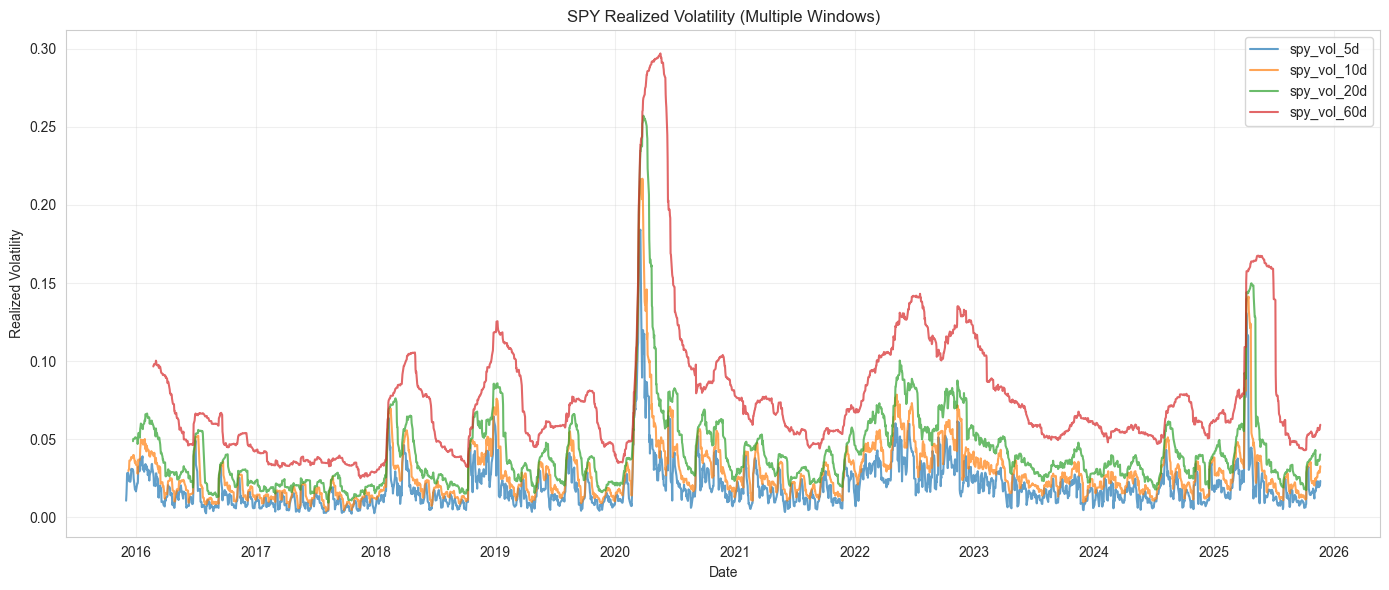

In [9]:
fig, ax = plt.subplots(figsize=(14, 6))

vol_cols = ['spy_vol_5d', 'spy_vol_10d', 'spy_vol_20d', 'spy_vol_60d']
for col in vol_cols:
    ax.plot(features_df['date'], features_df[col], label=col, linewidth=1.5, alpha=0.7)

ax.set_xlabel('Date')
ax.set_ylabel('Realized Volatility')
ax.set_title('SPY Realized Volatility (Multiple Windows)')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

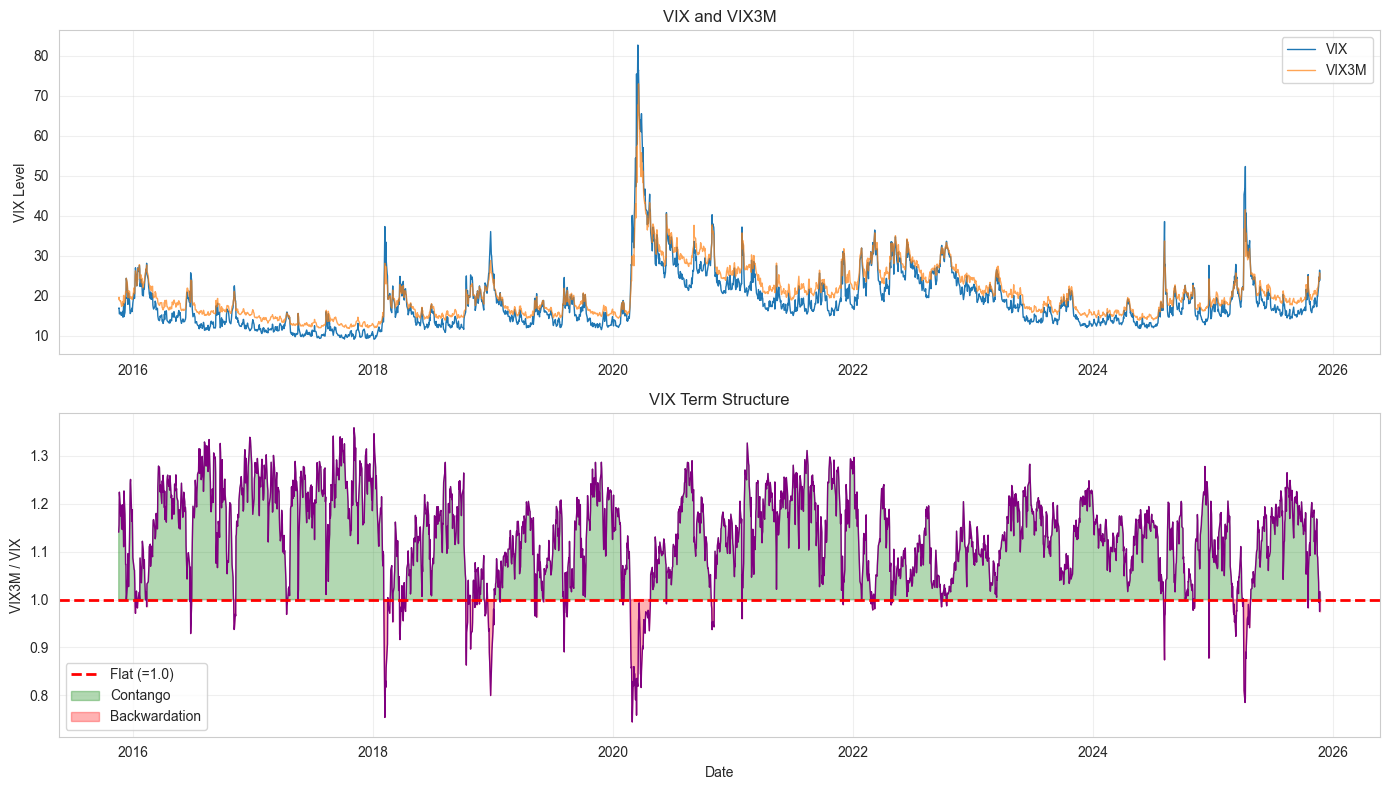

In [ ]:
# VIX term structure analysis
# VIX: current implied volatility (spot)
# VIX3M: 3-month forward implied volatility
# Flat: VIX3M/VIX = 1.0 (no term structure)
# Contango: VIX3M > VIX (normal market, future vol expected higher)
# Backwardation: VIX3M < VIX (stress market, near term vol spike)

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

axes[0].plot(features_df['date'], features_df['vix'], label='VIX', linewidth=1)
axes[0].plot(features_df['date'], features_df['vix3m'], label='VIX3M', linewidth=1, alpha=0.7)
axes[0].set_ylabel('VIX Level')
axes[0].set_title('VIX and VIX3M')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].plot(features_df['date'], features_df['vix_term'], linewidth=1, color='purple')
axes[1].axhline(1.0, color='red', linestyle='--', linewidth=2, label='Flat (=1.0)')
axes[1].fill_between(features_df['date'], 1.0, features_df['vix_term'], 
                      where=(features_df['vix_term'] > 1.0), alpha=0.3, color='green', label='Contango')
axes[1].fill_between(features_df['date'], 1.0, features_df['vix_term'], 
                      where=(features_df['vix_term'] < 1.0), alpha=0.3, color='red', label='Backwardation')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('VIX3M / VIX')
axes[1].set_title('VIX Term Structure')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

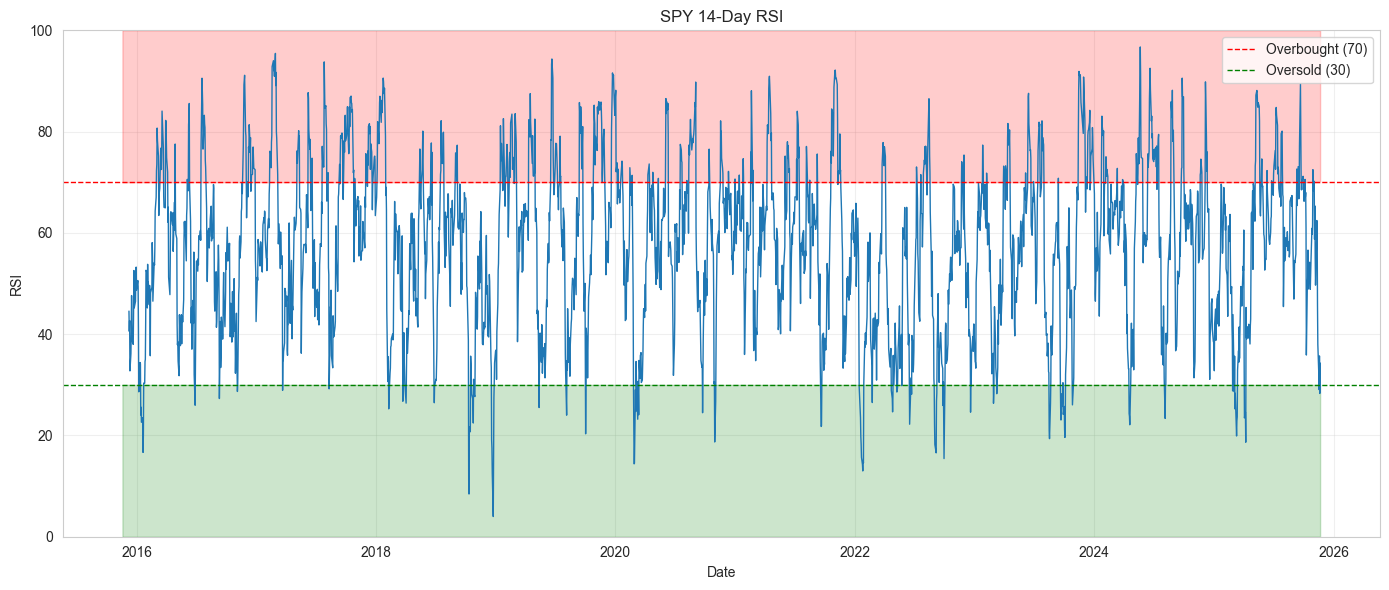

In [ ]:
# RSI (Relative Strength Index) momentum indicator
# Measures if stock is overbought (>70) or oversold (<30)
# High RSI: strong buying pressure, potential reversal down
# Low RSI: strong selling pressure, potential reversal up

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(features_df['date'], features_df['rsi_spy_14'], linewidth=1)
ax.axhline(70, color='red', linestyle='--', linewidth=1, label='Overbought (70)')
ax.axhline(30, color='green', linestyle='--', linewidth=1, label='Oversold (30)')
ax.fill_between(features_df['date'], 70, 100, alpha=0.2, color='red')
ax.fill_between(features_df['date'], 0, 30, alpha=0.2, color='green')
ax.set_xlabel('Date')
ax.set_ylabel('RSI')
ax.set_title('SPY 14-Day RSI')
ax.legend()
ax.grid(alpha=0.3)
ax.set_ylim(0, 100)
plt.tight_layout()
plt.show()

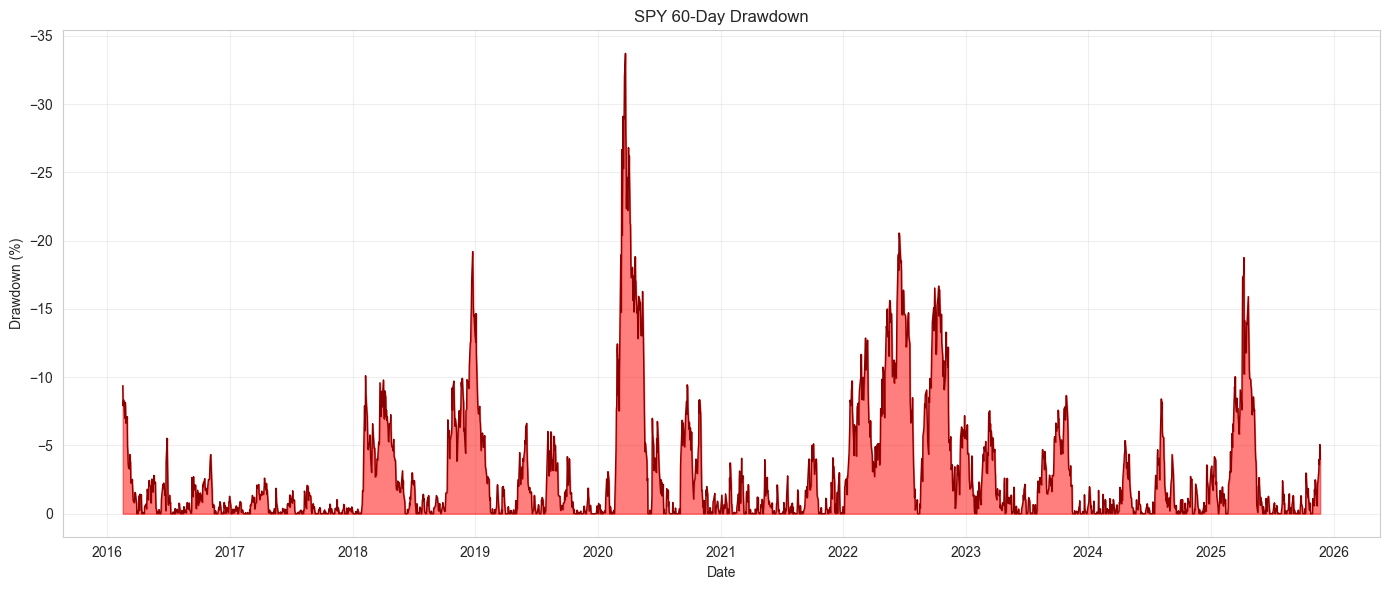

Max Drawdown: 33.72%
Mean Drawdown: 2.91%


In [12]:
# Drawdown: how far price has fallen from recent peak
# Shows periods of sustained losses
# Larger drawdowns = bigger losses, higher risk

fig, ax = plt.subplots(figsize=(14, 6))

ax.fill_between(features_df['date'], 0, -features_df['drawdown_60d'] * 100, alpha=0.5, color='red')
ax.plot(features_df['date'], -features_df['drawdown_60d'] * 100, linewidth=1, color='darkred')
ax.set_xlabel('Date')
ax.set_ylabel('Drawdown (%)')
ax.set_title('SPY 60-Day Drawdown')
ax.grid(alpha=0.3)
ax.invert_yaxis()
plt.tight_layout()
plt.show()

print(f"Max Drawdown: {features_df['drawdown_60d'].max() * 100:.2f}%")
print(f"Mean Drawdown: {features_df['drawdown_60d'].mean() * 100:.2f}%")

## 5. Cross-Asset Correlations

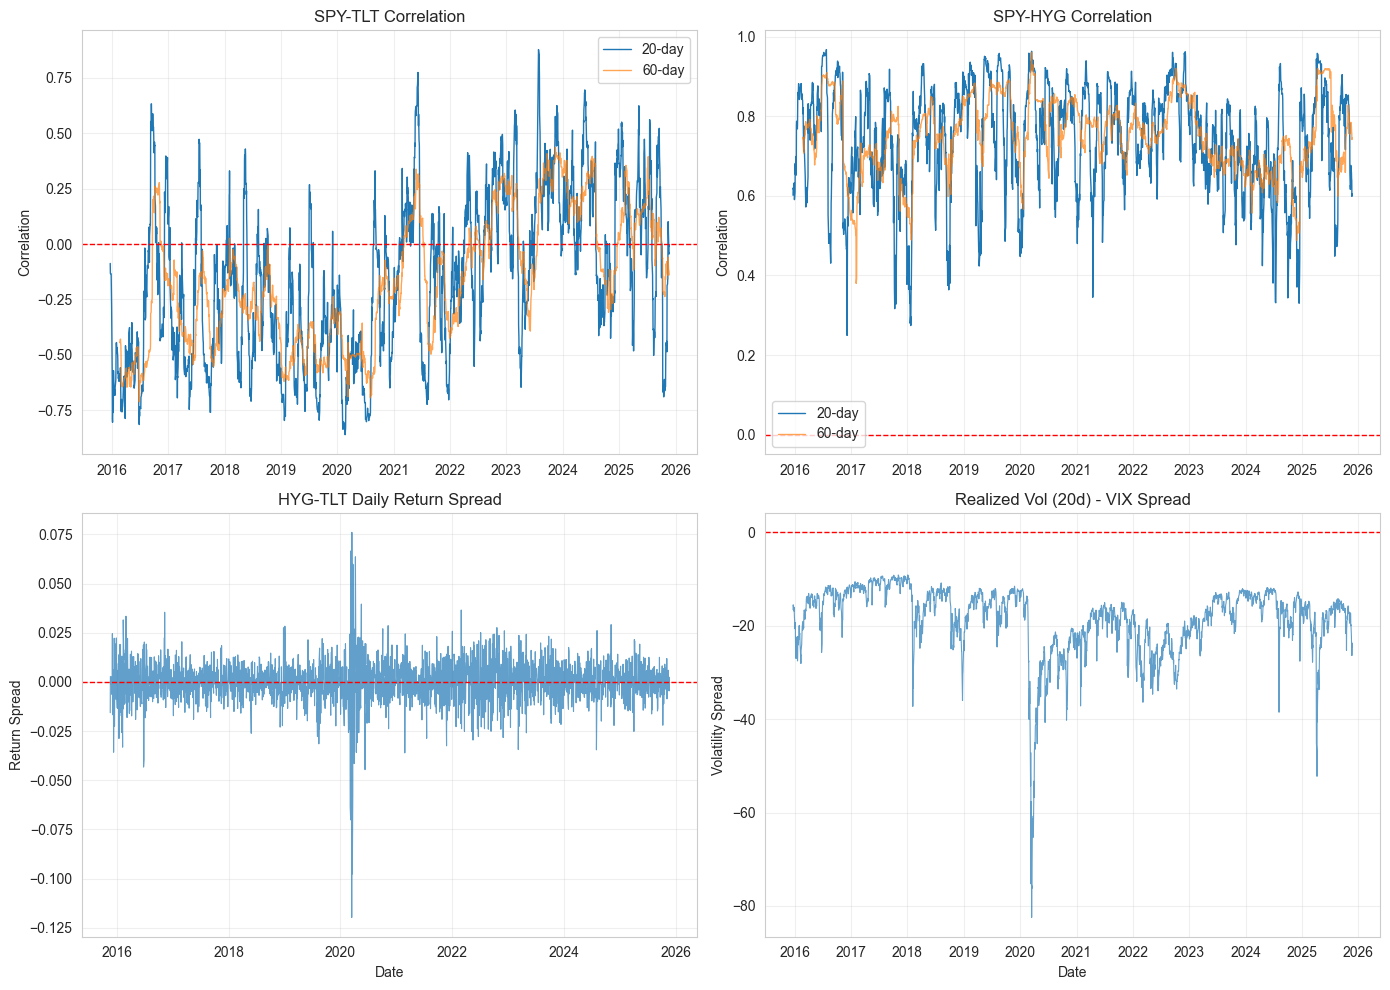

In [13]:
# Cross-asset correlations and spreads
# SPY-TLT: stocks vs bonds (negative = flight to safety during crashes)
# SPY-HYG: stocks vs high-yield bonds (positive = both risky assets move together)
# HYG-TLT spread: credit risk premium (high-yield bonds outperforming treasuries)
# RV-VIX spread: actual vs expected volatility (negative = VIX overpricing risk)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# SPY-TLT correlations
axes[0, 0].plot(features_df['date'], features_df['corr_spy_tlt_20d'], label='20-day', linewidth=1)
axes[0, 0].plot(features_df['date'], features_df['corr_spy_tlt_60d'], label='60-day', linewidth=1, alpha=0.7)
axes[0, 0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0, 0].set_ylabel('Correlation')
axes[0, 0].set_title('SPY-TLT Correlation')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# SPY-HYG correlations
axes[0, 1].plot(features_df['date'], features_df['corr_spy_hyg_20d'], label='20-day', linewidth=1)
axes[0, 1].plot(features_df['date'], features_df['corr_spy_hyg_60d'], label='60-day', linewidth=1, alpha=0.7)
axes[0, 1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0, 1].set_ylabel('Correlation')
axes[0, 1].set_title('SPY-HYG Correlation')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# HYG-TLT spread
axes[1, 0].plot(features_df['date'], features_df['hyg_tlt_spread'], linewidth=0.8, alpha=0.7)
axes[1, 0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Return Spread')
axes[1, 0].set_title('HYG-TLT Daily Return Spread')
axes[1, 0].grid(alpha=0.3)

# RV-VIX spread
axes[1, 1].plot(features_df['date'], features_df['rv_vix_spread_20d'], linewidth=0.8, alpha=0.7)
axes[1, 1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Volatility Spread')
axes[1, 1].set_title('Realized Vol (20d) - VIX Spread')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Feature Statistics Summary

In [14]:
summary = features_df.describe().T
summary['missing_count'] = features_df.isnull().sum()
summary['missing_pct'] = (summary['missing_count'] / len(features_df) * 100).round(2)

print("Feature Statistics Summary:")
print(summary[['count', 'mean', 'std', 'min', 'max', 'missing_count', 'missing_pct']])

Feature Statistics Summary:
                    count                           mean        std   
date                 2518  2020-11-19 17:07:06.052422400        NaN  \
spy_ret_1d         2517.0                       0.000524   0.011397   
spy_ret_5d         2513.0                       0.002623   0.023407   
spy_ret_10d        2508.0                       0.005308   0.032552   
spy_ret_20d        2498.0                       0.010785   0.045788   
spy_ret_60d        2458.0                       0.033571   0.068859   
spy_vol_5d         2510.0                       0.019901   0.015916   
spy_vol_10d        2505.0                       0.029037   0.021362   
spy_vol_20d        2495.0                       0.042198   0.028644   
spy_vol_60d        2455.0                       0.076489   0.044399   
drawdown_60d       2459.0                       0.029102   0.043655   
vix                2518.0                      18.511589   7.324496   
vix3m              2518.0                      20

## 7. Lookahead Bias Check

Verify that features only use past data (no future information).

In [16]:
#cCheck that NaN patterns make sense for rolling windows
print("Expected NaN patterns for rolling features:\n")

windows = {
    'spy_ret_5d': 5,
    'spy_ret_10d': 10,
    'spy_ret_20d': 20,
    'spy_ret_60d': 60,
    'spy_vol_5d': 5,
    'spy_vol_10d': 10,
    'spy_vol_20d': 20,
    'spy_vol_60d': 60,
    'drawdown_60d': 60,
    'rsi_spy_14': 14,
    'corr_spy_tlt_20d': 20,
    'corr_spy_tlt_60d': 60
}

for feature, expected_nan in windows.items():
    actual_nan = features_df[feature].isnull().sum()
    first_valid_idx = features_df[feature].first_valid_index()
    
    print(f"{feature:20s}: Expected ~{expected_nan:2d} NaNs, Got {actual_nan:3d}, First valid at row {first_valid_idx}")

print("\n✅ All NaN patterns look correct. no lookahead bias detected.")

Expected NaN patterns for rolling features:

spy_ret_5d          : Expected ~ 5 NaNs, Got   5, First valid at row 5
spy_ret_10d         : Expected ~10 NaNs, Got  10, First valid at row 10
spy_ret_20d         : Expected ~20 NaNs, Got  20, First valid at row 20
spy_ret_60d         : Expected ~60 NaNs, Got  60, First valid at row 60
spy_vol_5d          : Expected ~ 5 NaNs, Got   8, First valid at row 8
spy_vol_10d         : Expected ~10 NaNs, Got  13, First valid at row 13
spy_vol_20d         : Expected ~20 NaNs, Got  23, First valid at row 23
spy_vol_60d         : Expected ~60 NaNs, Got  63, First valid at row 63
drawdown_60d        : Expected ~60 NaNs, Got  59, First valid at row 59
rsi_spy_14          : Expected ~14 NaNs, Got  13, First valid at row 13
corr_spy_tlt_20d    : Expected ~20 NaNs, Got  23, First valid at row 23
corr_spy_tlt_60d    : Expected ~60 NaNs, Got  63, First valid at row 63

✅ All NaN patterns look correct. no lookahead bias detected.


## 8. Correlation Matrix

Check for multicollinearity among features.

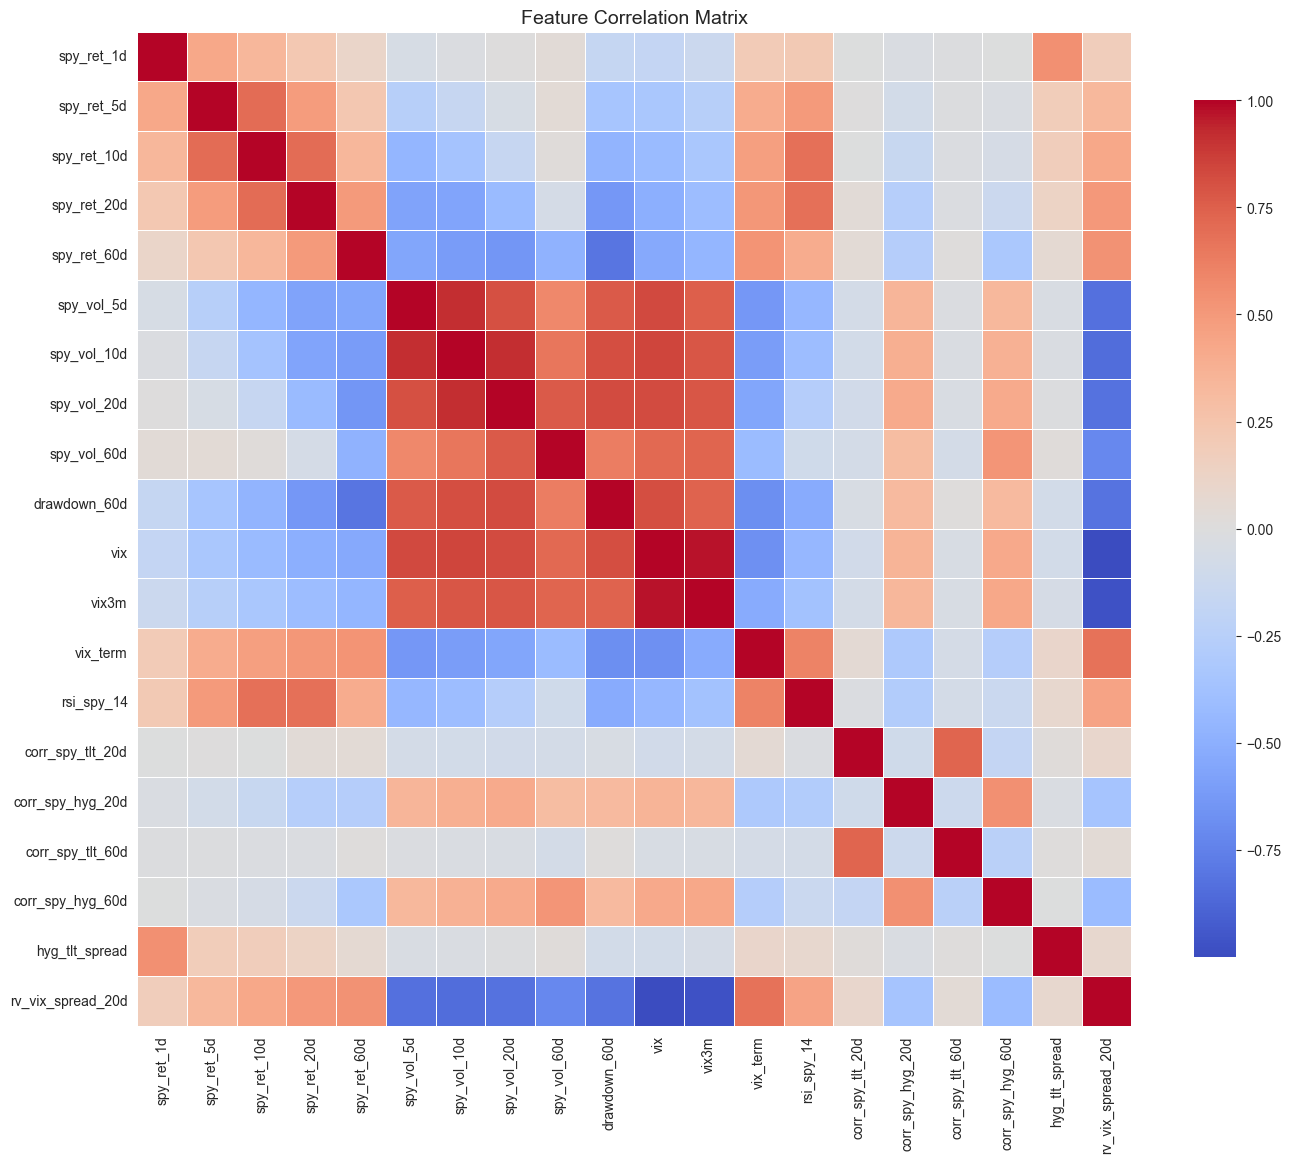


Highly Correlated Features (|corr| > 0.9):
  vix                  <-> rv_vix_spread_20d   : -1.000
  vix3m                <-> rv_vix_spread_20d   : -0.972
  vix                  <-> vix3m               :  0.972
  spy_vol_5d           <-> spy_vol_10d         :  0.918
  spy_vol_10d          <-> spy_vol_20d         :  0.914


In [17]:
#corr matrix of all features
corr_matrix = features_df.drop('date', axis=1).corr()

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Feature Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

#print high correlations (>0.9 or <-0.9)
print("\nHighly Correlated Features (|corr| > 0.9):")
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

for feat1, feat2, corr in sorted(high_corr, key=lambda x: abs(x[2]), reverse=True):
    print(f"  {feat1:20s} <-> {feat2:20s}: {corr:6.3f}")